In [1]:
import pandas as pd

df = pd.read_csv('data-covid19.csv')
df['fecha'] = pd.to_datetime(df.fecha)

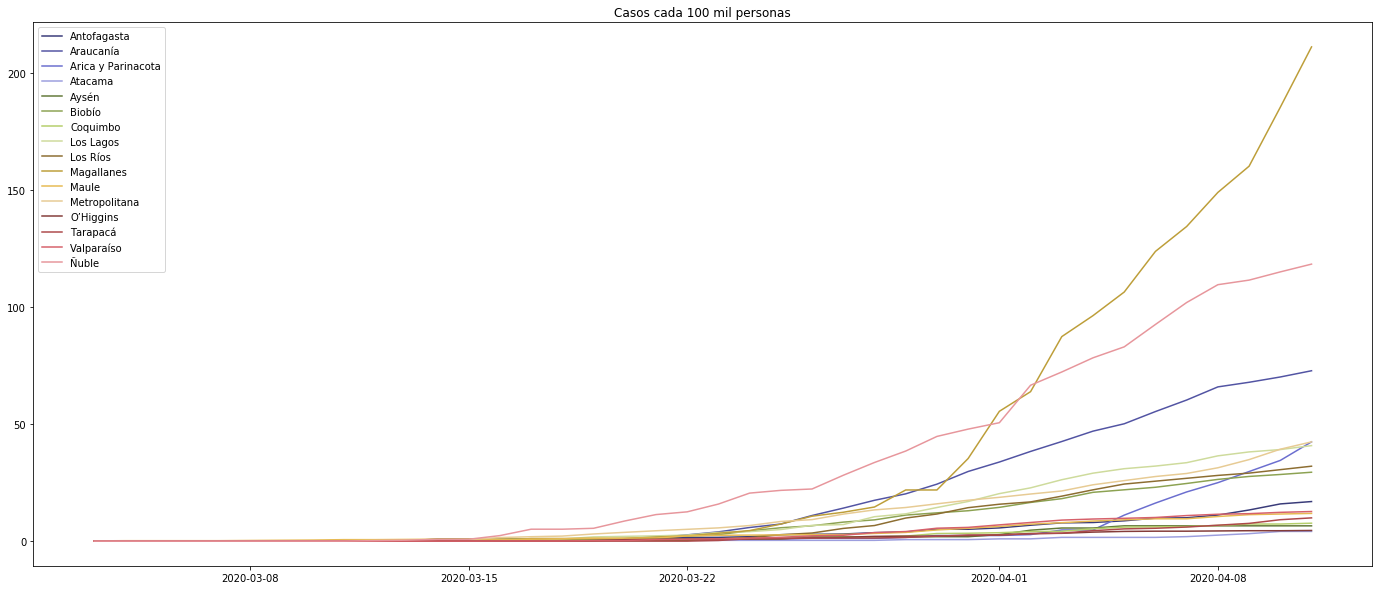

In [2]:
import matplotlib.pyplot as plt

color_map = plt.get_cmap('tab20b')

fig, ax = plt.subplots(figsize=(24, 10))

for i, (region, rdf) in enumerate(df.groupby('region')):
    ax.plot(rdf.fecha, rdf.total_cada_100mil, label=region, color=color_map.colors[i])
    #rdf.set_index('fecha').total_cada_100mil.plot(figsize=(16, 8), label=region, cmap=color_map)
    #plt.xticks(rdf.fecha, rotation=90)
    #plt.show()
    #plt.close()
plt.title('Casos cada 100 mil personas')
plt.legend();

In [3]:
import matplotlib.pyplot as plt
import datetime

def plot_gam(gam, title, X, y, save = False, ylim=110):
    fig, ax = plt.subplots(figsize=(24, 10))
    #plt.figure(figsize=(12, 12));

    XX = gam.generate_X_grid(0)

    plt.plot(nday2datetime_list(XX[:, 0]), gam.predict(XX), 'r--')
    plt.plot(nday2datetime_list(XX[:, 0]), gam.prediction_intervals(XX), color='b', ls='--')

    plt.scatter(X, y, facecolor='gray', edgecolors='none')
    plt.title(title)
    plt.xticks(X, rotation=90)
    plt.ylim(0, ylim)
    
    # Create transformers for lines
    data2figure_trans = ax.transData
    figure2ax_trans = ax. transAxes.inverted()
    
    for point in zip(X, y.values):
        # Convert point from data to figure cordinate system
        f_point = data2figure_trans.transform([0, point[1]])
        # Convert point from figure to axis coordinate system
        a_point = figure2ax_trans.transform(f_point)
        
        plt.axvline(point[0], ymax=a_point[1], linestyle=':', color='gray')
    if save:
        plt.savefig(f'plots/{title}.png')
    plt.show()
    plt.close()
        
def nday2datetime(nday):
    base_date = datetime.datetime(2020, 3, 3)
    return base_date + datetime.timedelta(days=nday)

def nday2datetime_list(nday_list):
    result = []
    for nday in nday_list:
        result.append(nday2datetime(nday))
        
    return result

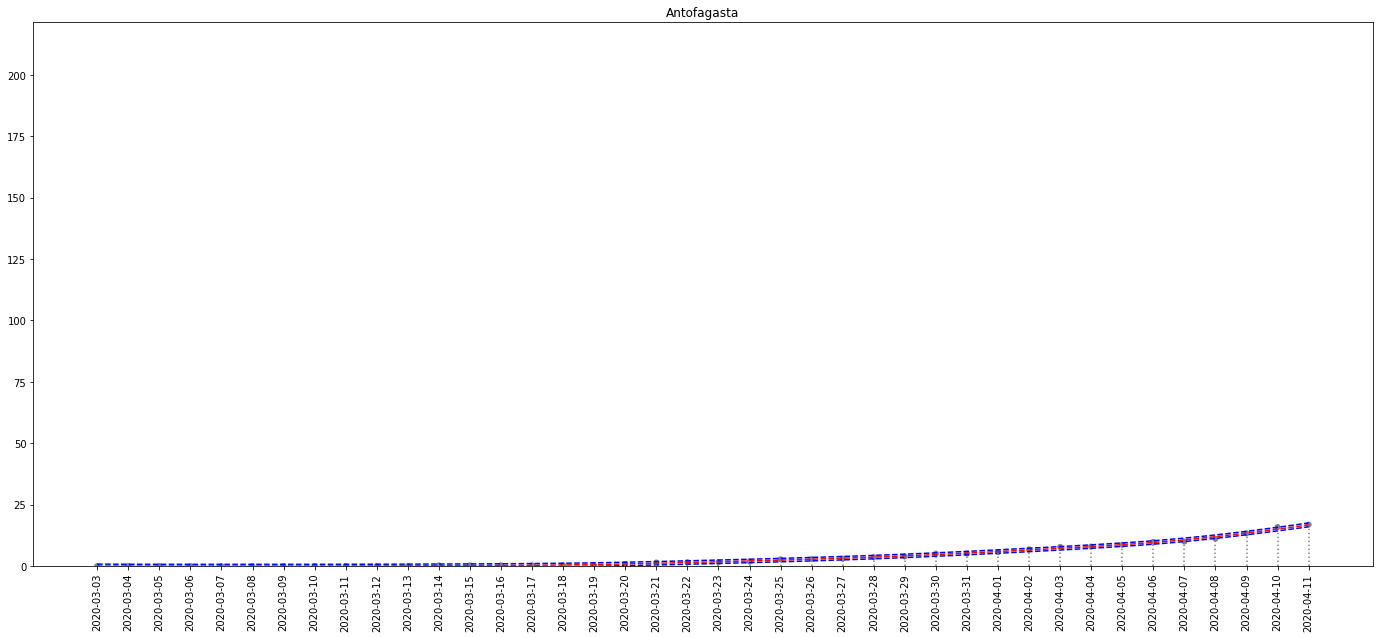

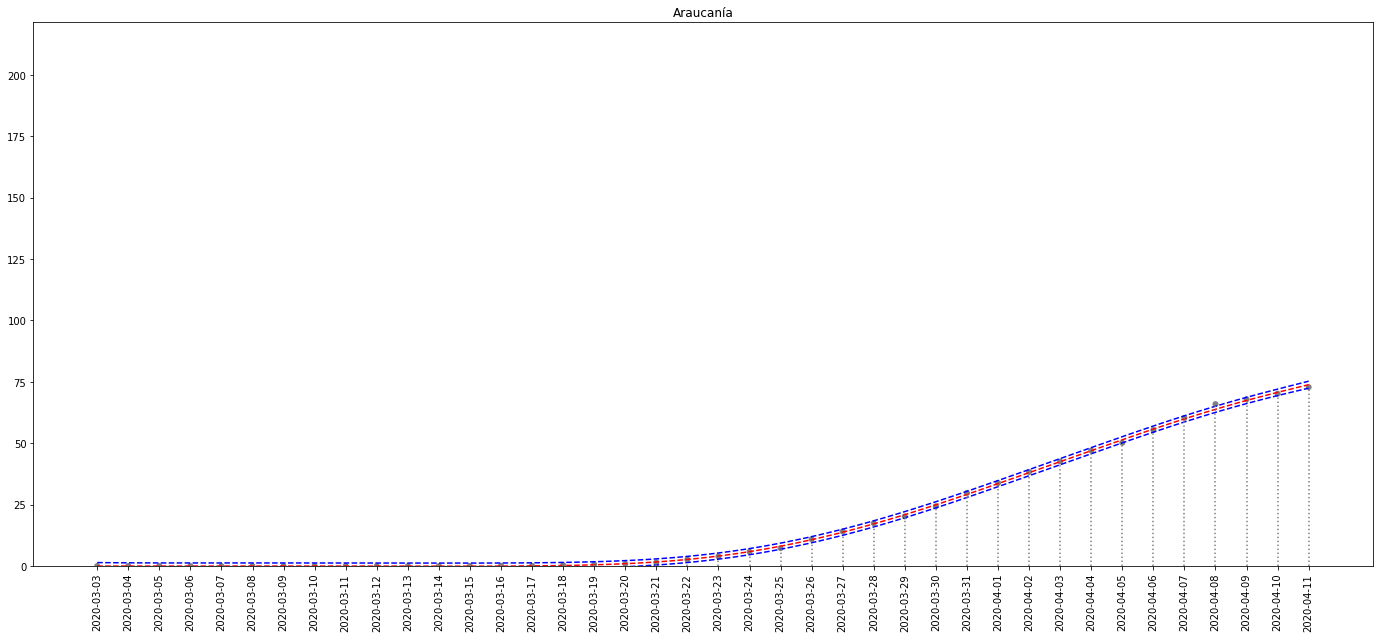

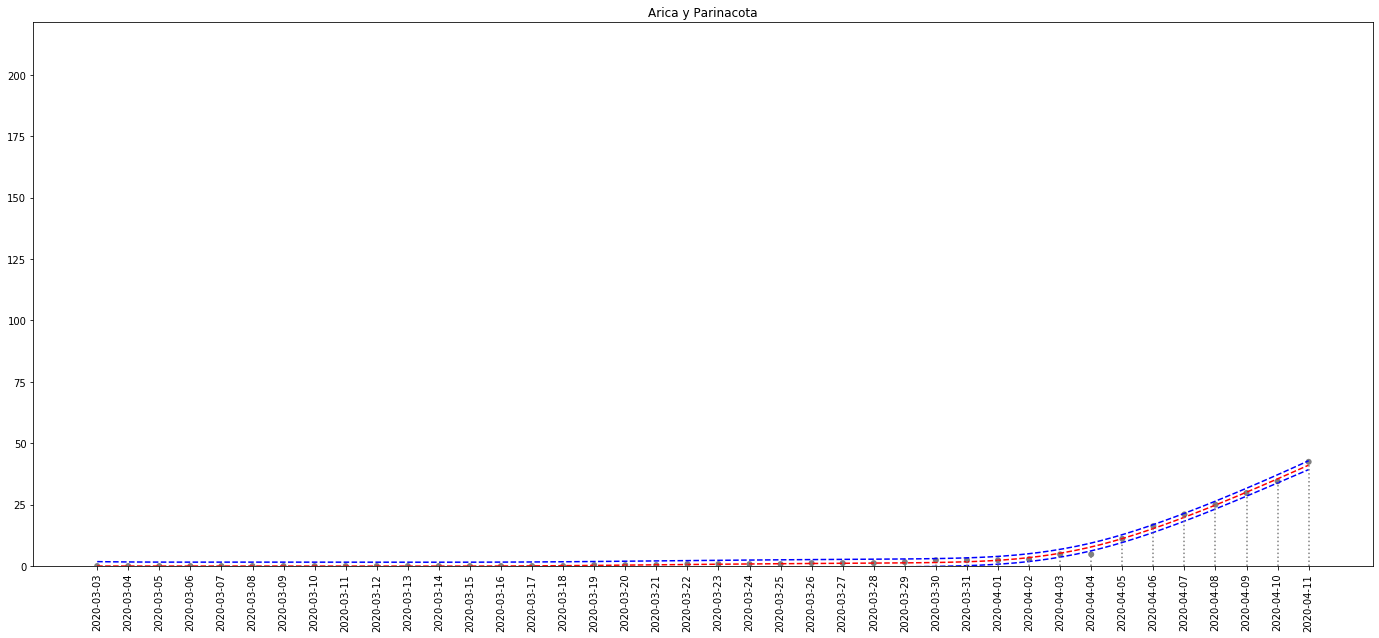

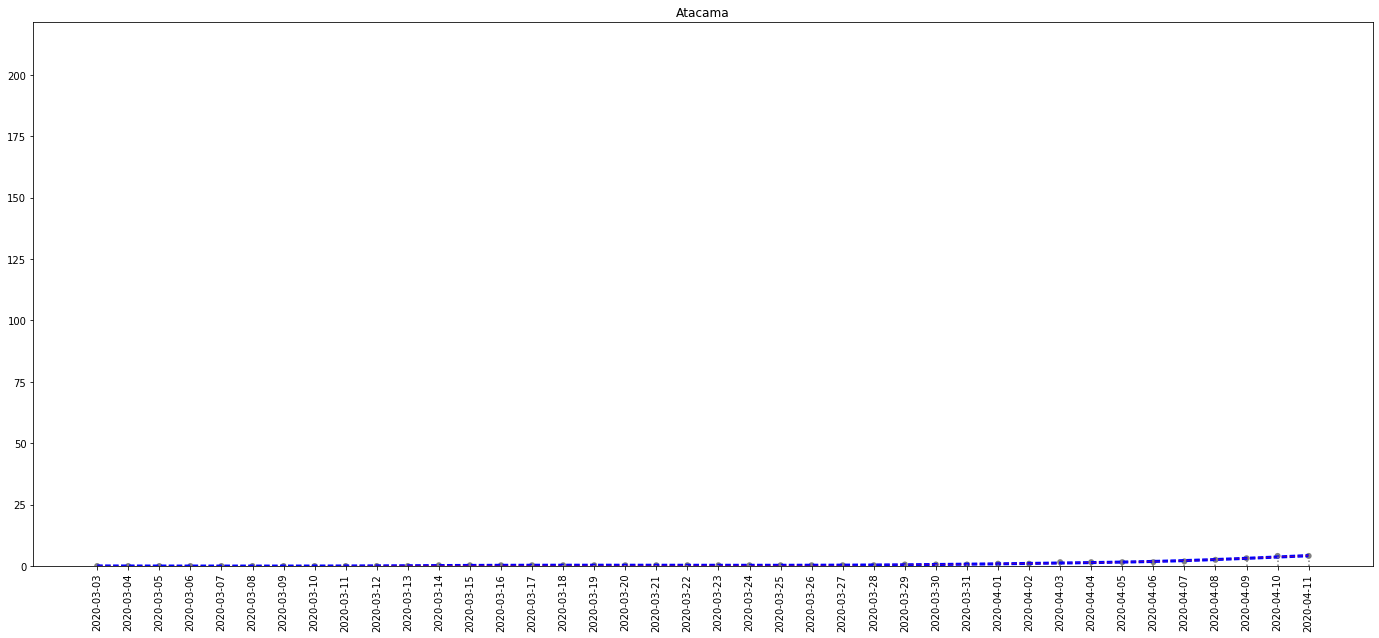

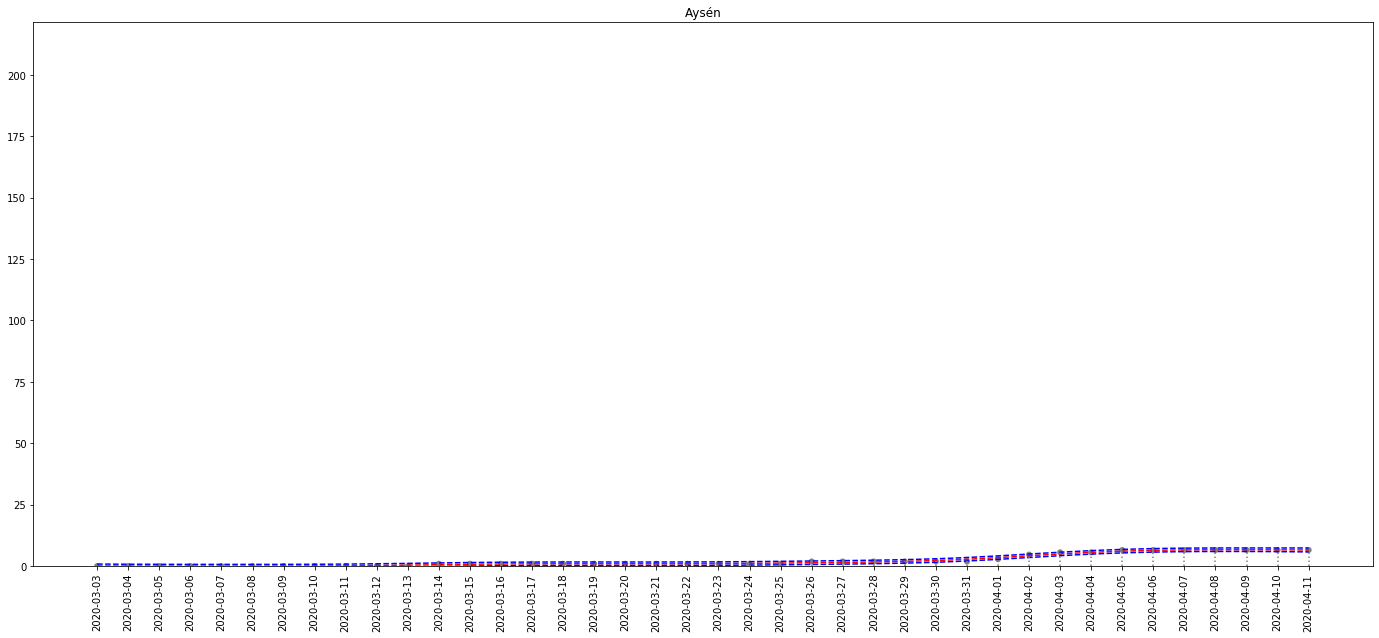

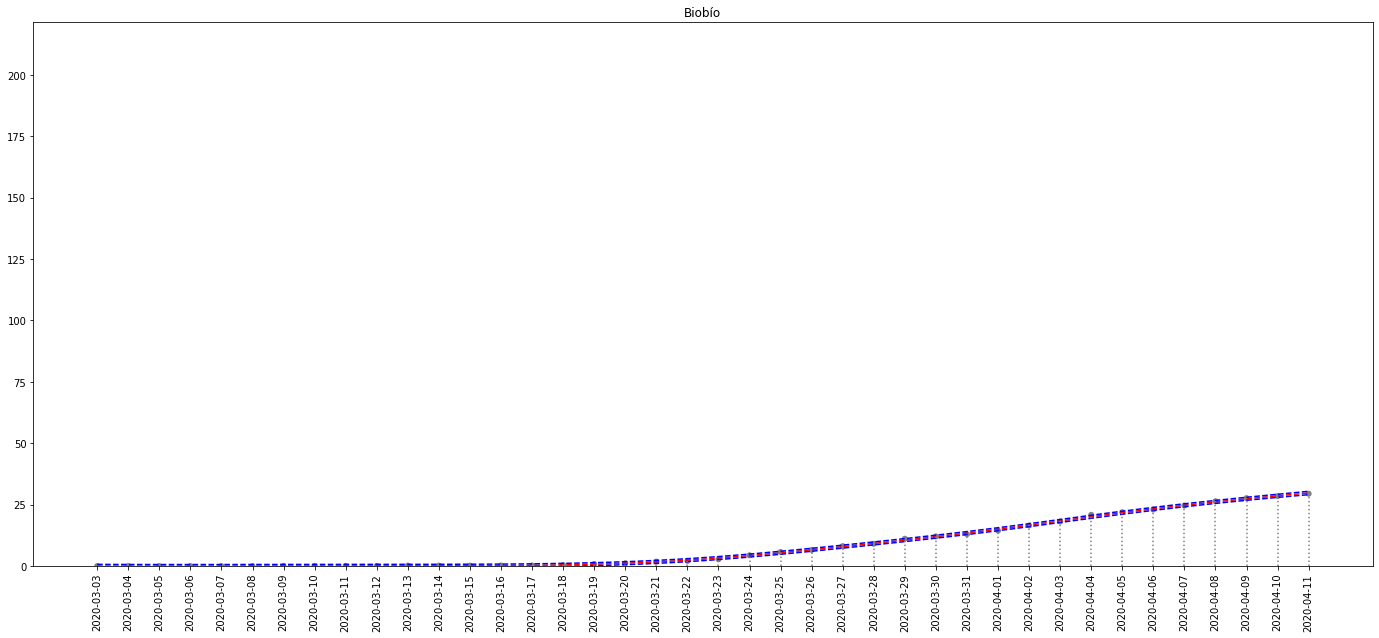

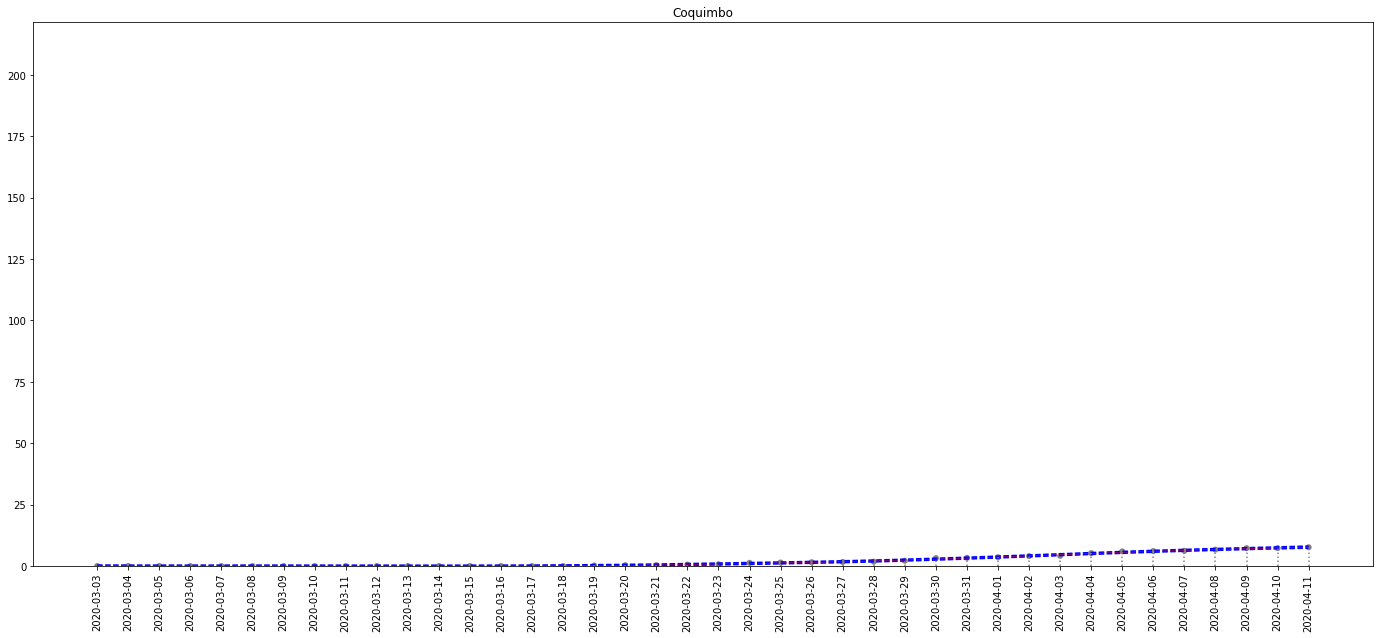

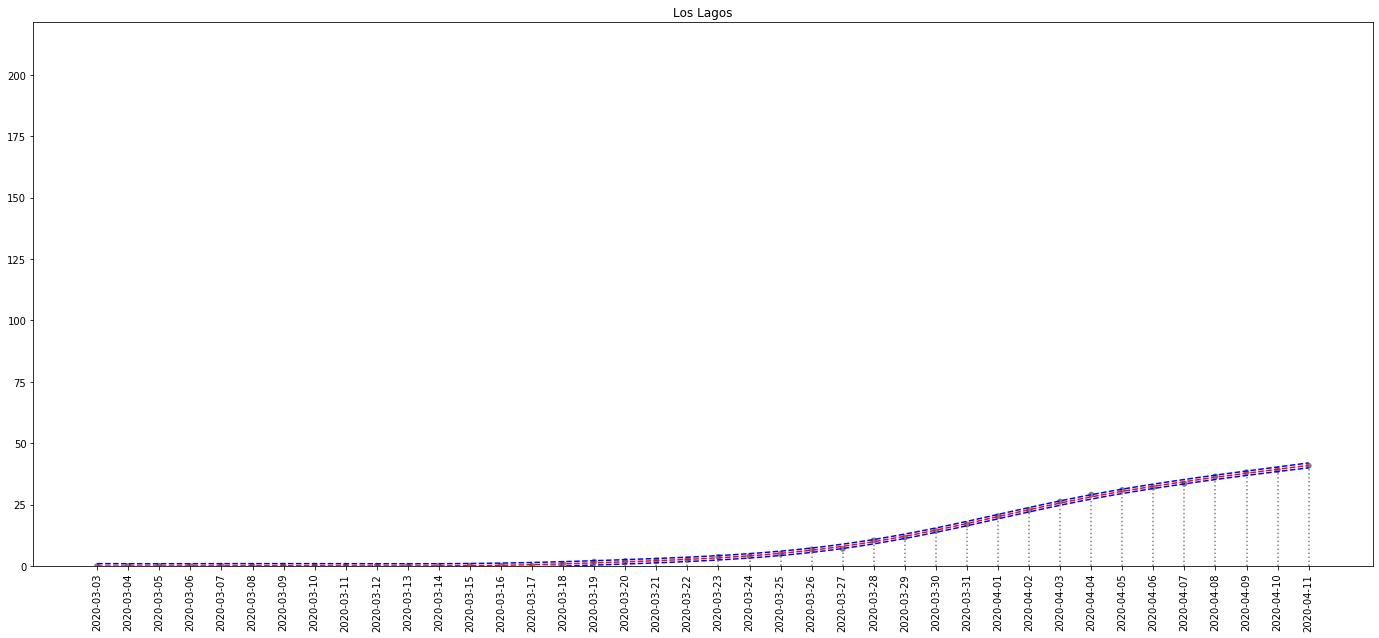

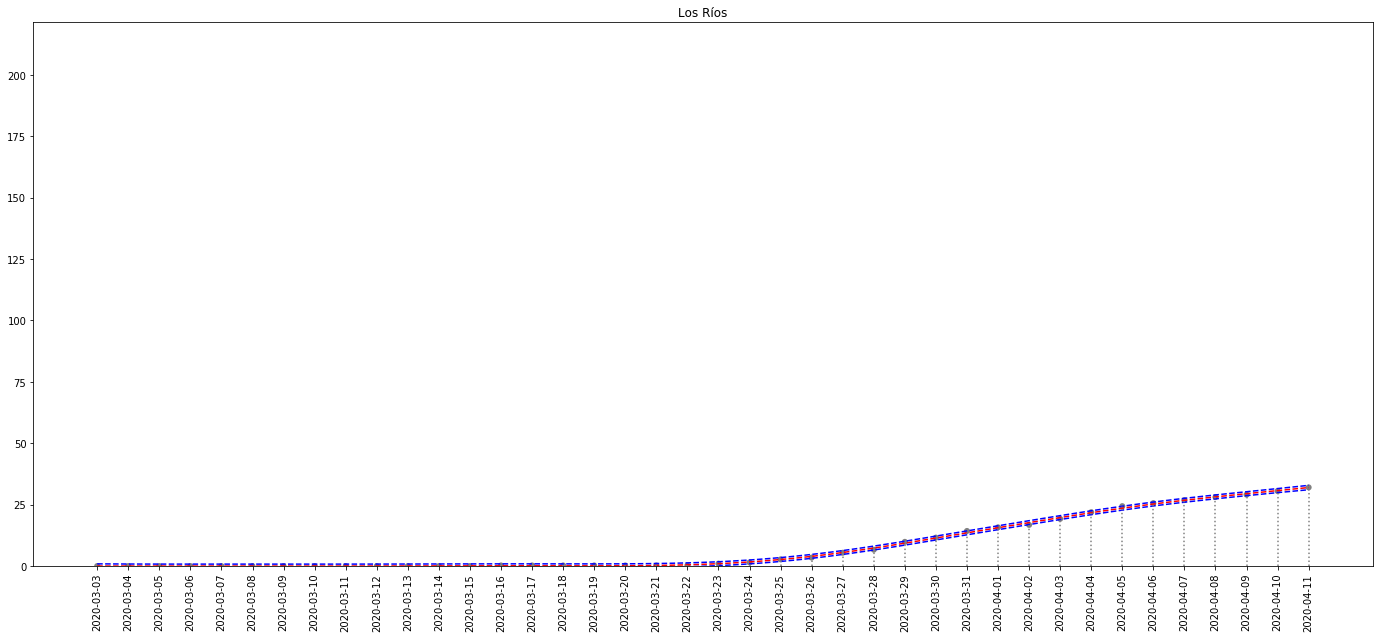

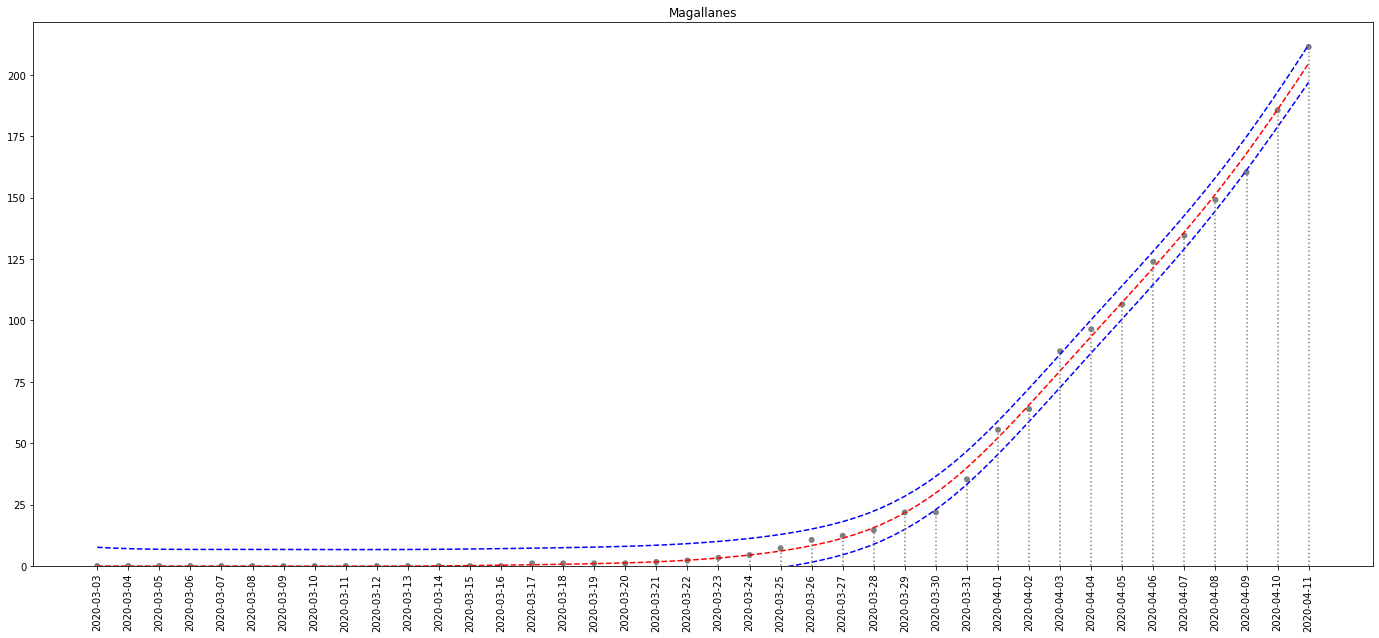

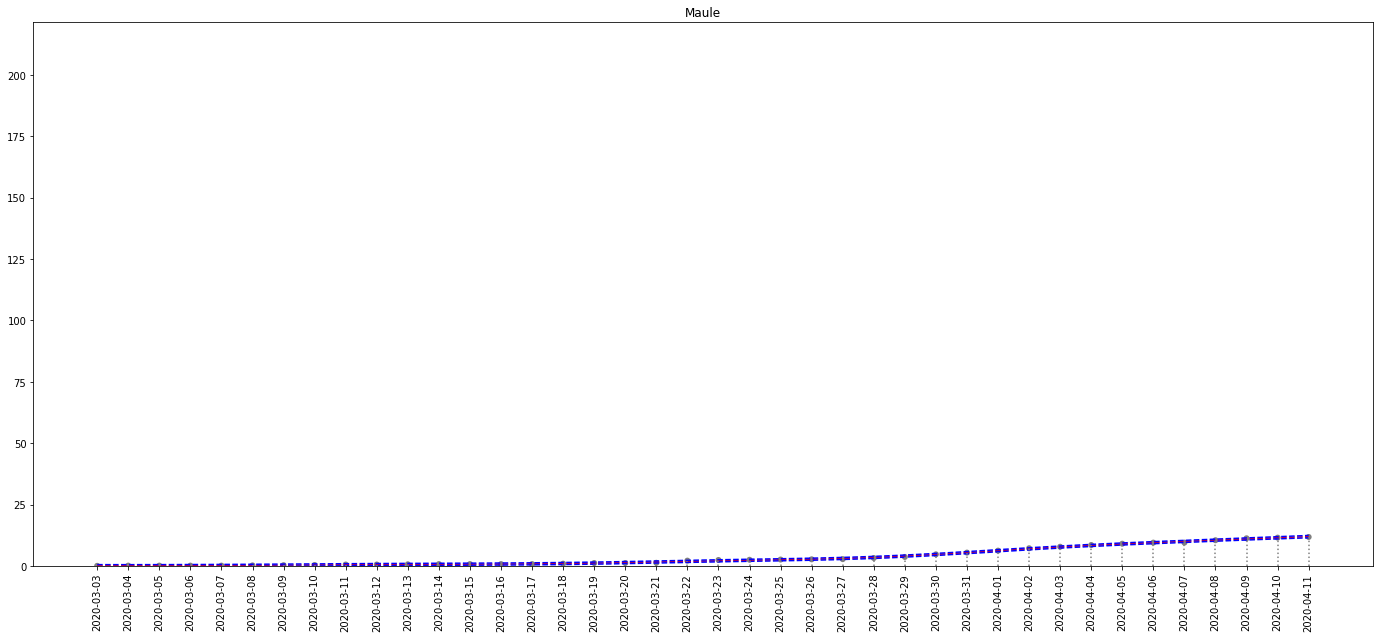

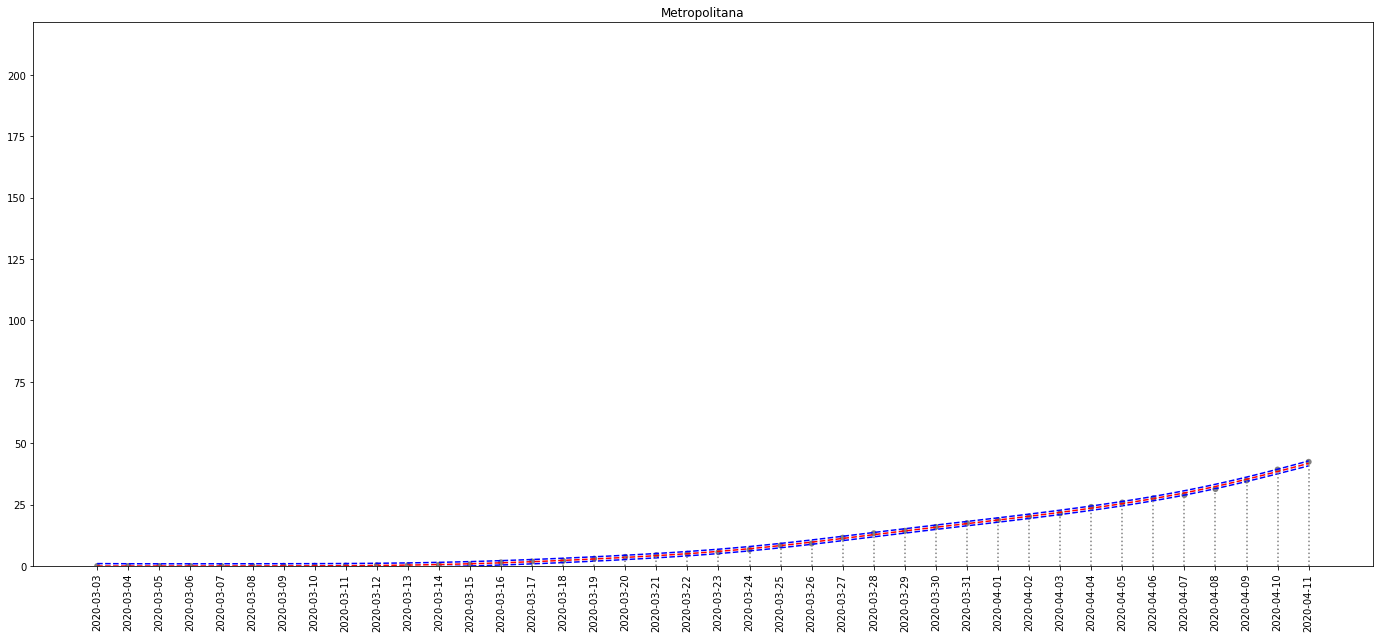

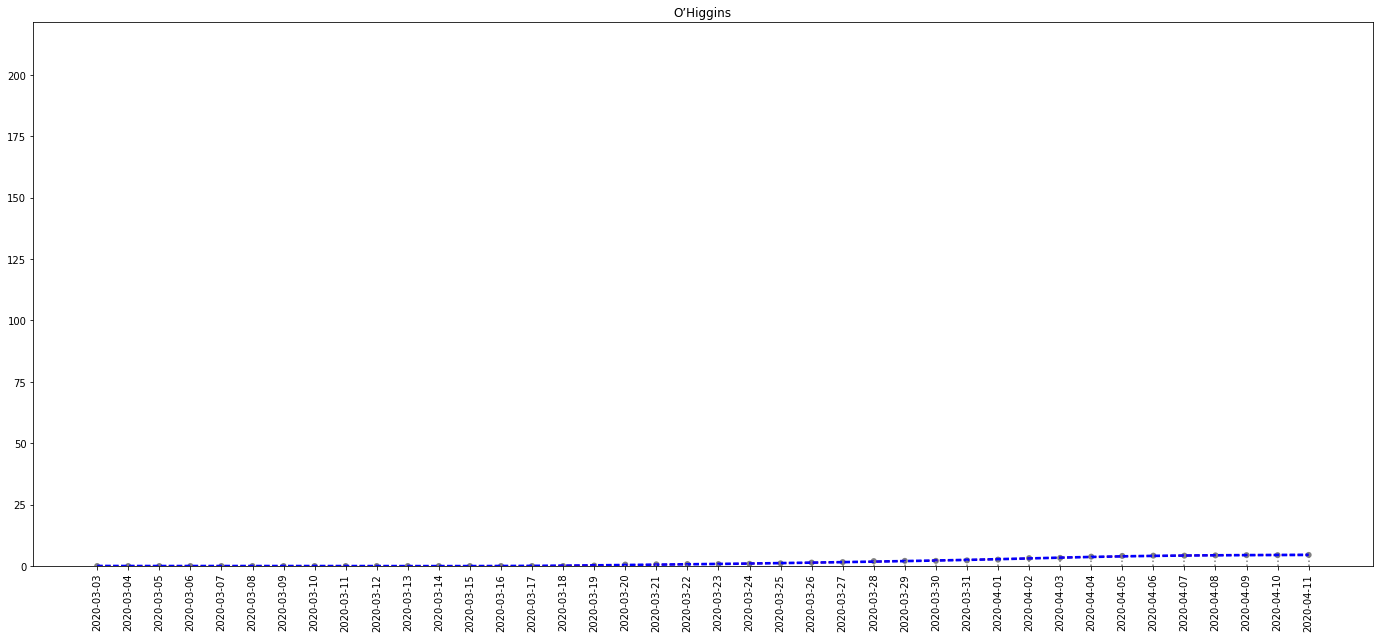

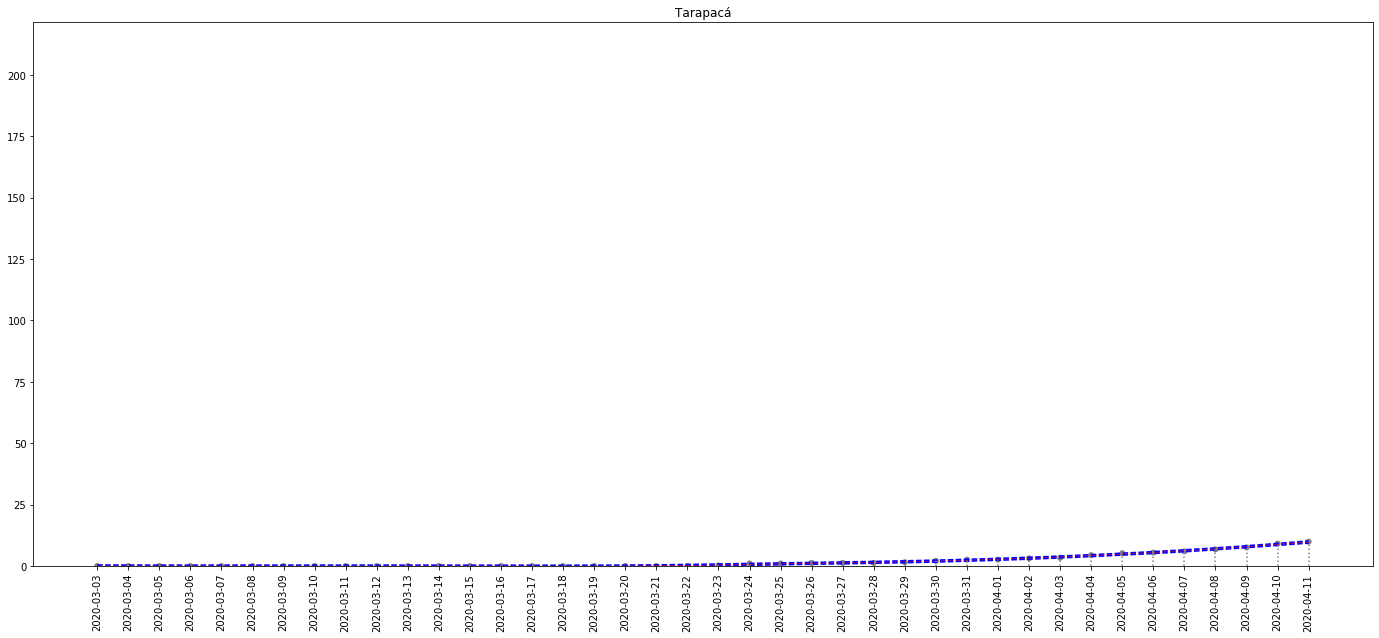

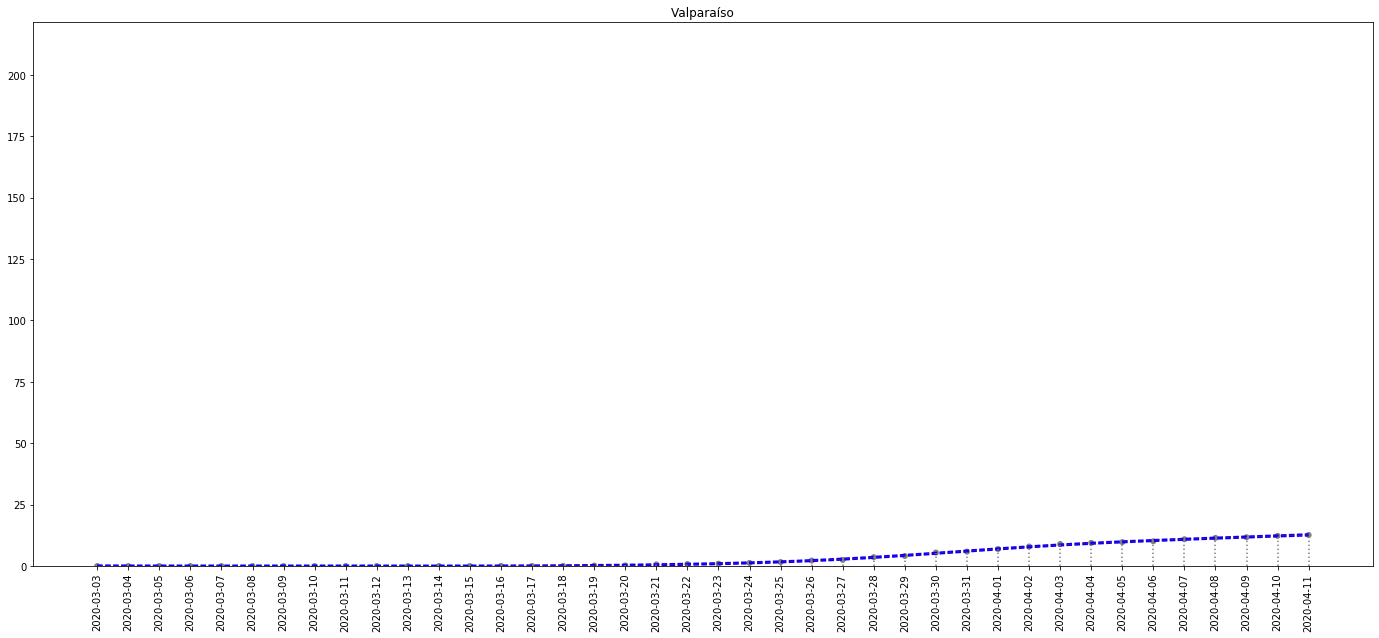

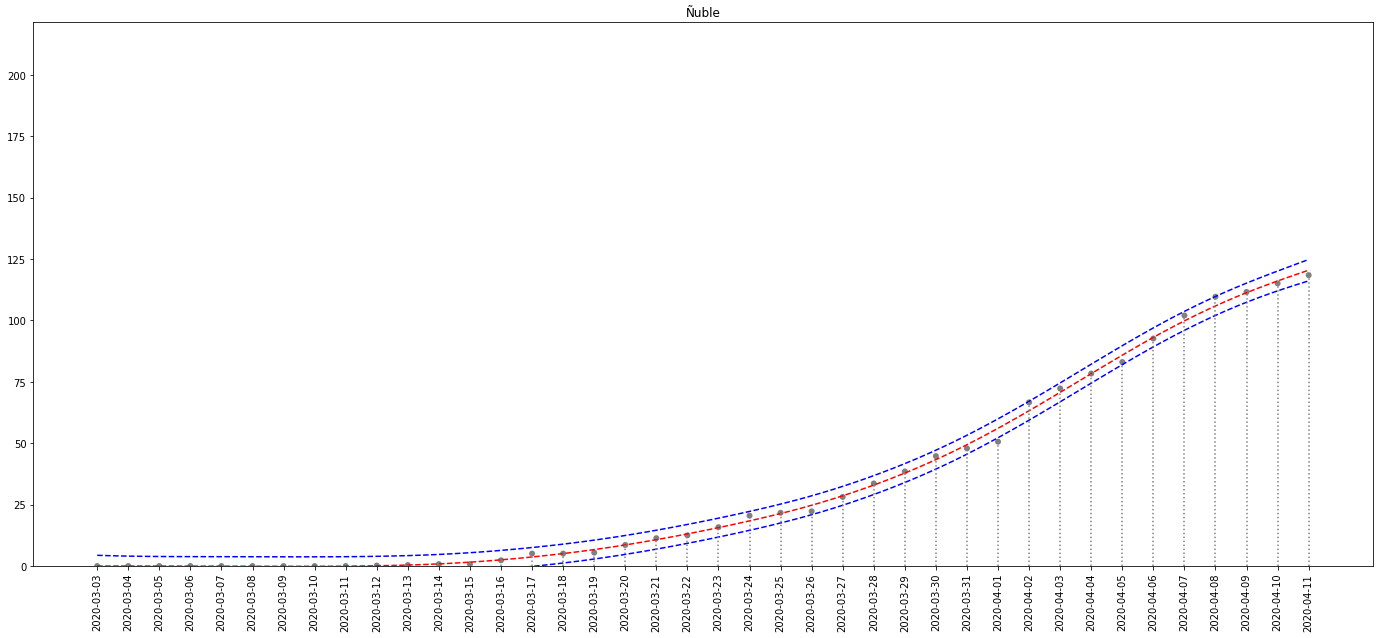

In [4]:
import numpy as np
from pygam import LinearGAM, s, f

y_max = df.groupby('region').total_cada_100mil.max().max() + 10

for i, (region, rdf) in enumerate(df.groupby('region')):
    # Preparamos X, y
    X = np.expand_dims(rdf.reset_index().index.to_numpy(), 1)
    y = rdf.total_cada_100mil
    
    # Definimos nuetras GAM como una linear de s(0, n_splines=n_splines)
    n_splines = 20
    gam = LinearGAM(s(0, n_splines=n_splines))
    
    # Hacemos fit
    gam.fit(X, y)
    
    # Plot
    plot_gam(gam, f'{region}', rdf.fecha, y, True, y_max)